<a href="https://colab.research.google.com/github/Firizki17/Machine-Learning/blob/main/Feature_enginering_Firizki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref : https://www.datacamp.com/tutorial/feature-engineering

# EDA

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Load dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('train.csv')

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
df.shape

(1259, 81)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [27]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,218
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


## lakukan data understanding

In [28]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1259.000000,1041.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1252.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,...,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,363.586303,42.353617,23.522213,10391.598333,1.381394,1.119465,29.933659,20.617506,182.185126,439.025793,...,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,315.500000,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,630.000000,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,944.500000,70.000000,80.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,1259.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1259,1259,76,1259,1259,1259,1259,1259,1259,1259,...,1188,1188,1188,1188,1259,4,240,51,1259,1259
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,995,1253,42,794,1134,1258,906,1192,193,1085,...,753,524,1134,1146,1158,2,137,47,1087,1024


In [31]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

# Data Visualization

UNIVARIATE

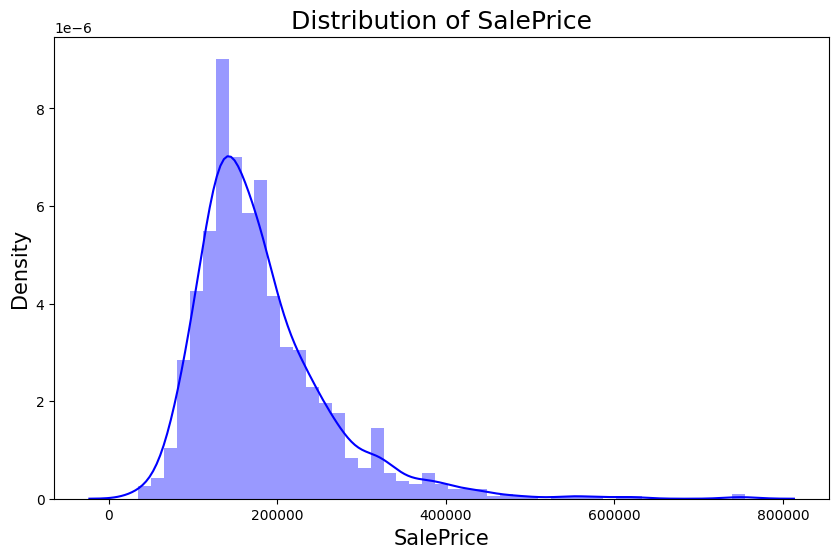

In [34]:
plt.figure(figsize=(10,6))
# Assuming 'SalePrice' is the target variable you want to visualize
sns.distplot(df['SalePrice'], color='b')
plt.title('Distribution of SalePrice', size=18)
plt.xlabel('SalePrice', size=15)
plt.ylabel('Density', size=15)
plt.show()

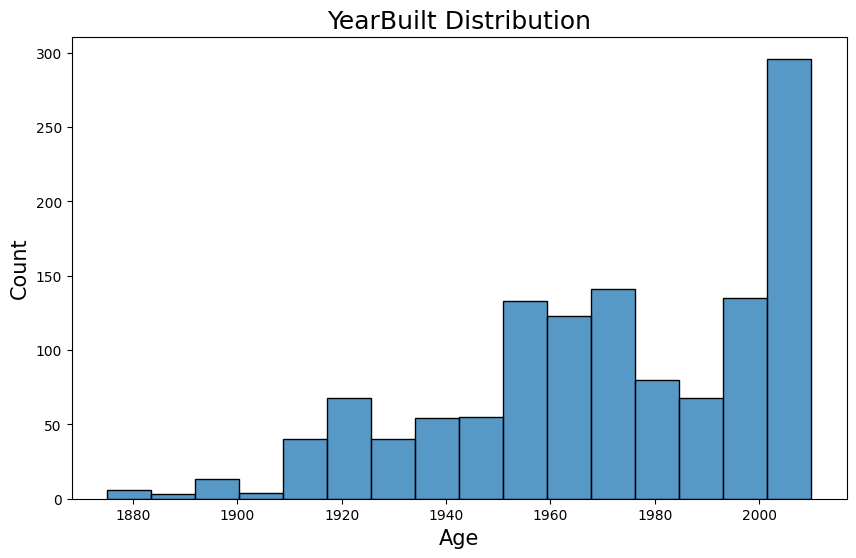

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df.YearBuilt)
plt.title('YearBuilt Distribution',size=18)
plt.xlabel('Age',size=15)
plt.ylabel('Count',size=15)
plt.show()

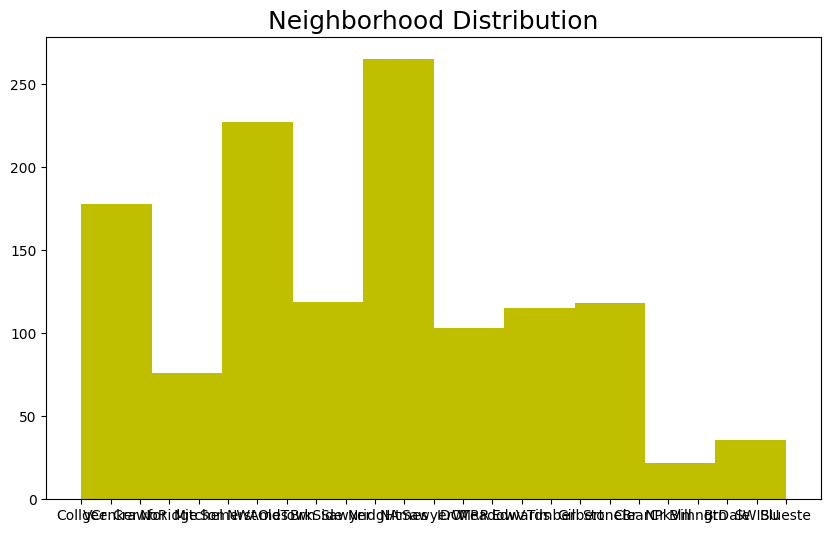

In [37]:
plt.figure(figsize=(10,6))
plt.hist(df.Neighborhood,color='y')
plt.title('Neighborhood Distribution',size=18)
plt.show()

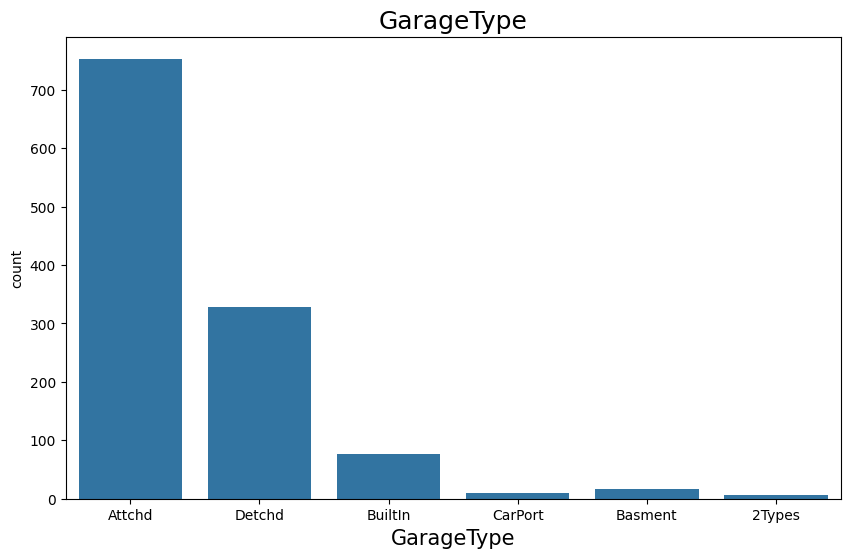

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='GarageType', data=df)
plt.title('GarageType',size=18)
plt.xlabel('GarageType',size=15)
plt.show()
plt.show()

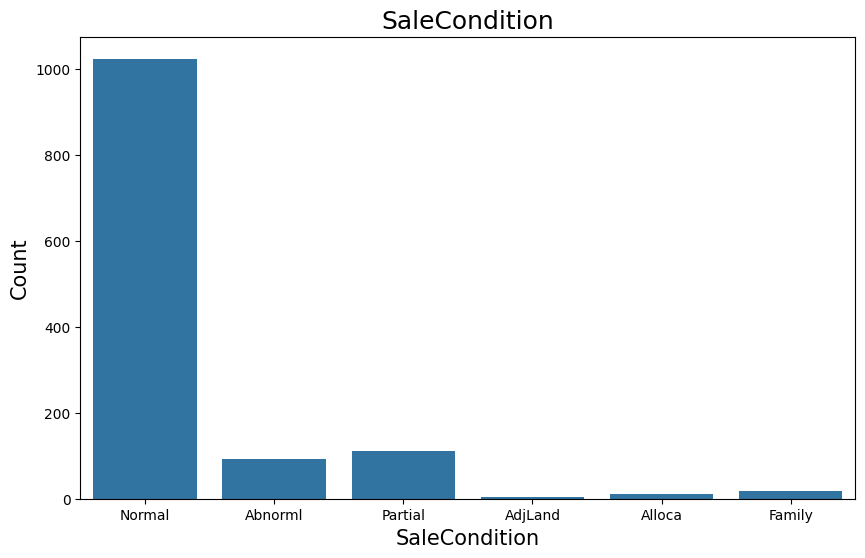

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='SaleCondition', data=df)
plt.title('SaleCondition',size=18)
plt.xlabel('SaleCondition',size=15)
plt.ylabel('Count',size=15)
plt.show()

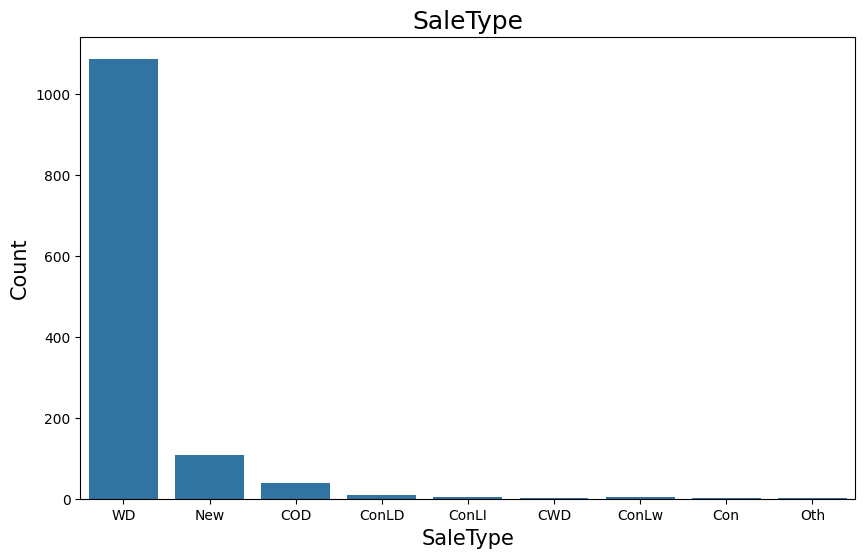

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='SaleType', data=df)
plt.title('SaleType',size=18)
plt.xlabel('SaleType',size=15)
plt.ylabel('Count',size=15)
plt.show()

BIVARIATE

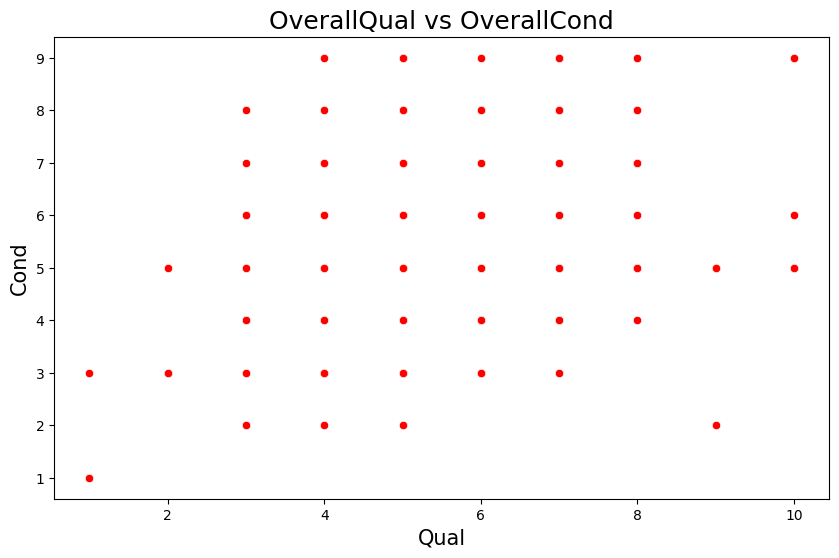

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='OverallQual', y='OverallCond', color = 'r', data=df)
plt.title('OverallQual vs OverallCond',size=18)
plt.xlabel('Qual',size=15)
plt.ylabel('Cond',size=15)
plt.show()

Text(0.5, 1.0, 'Condition vs Type')

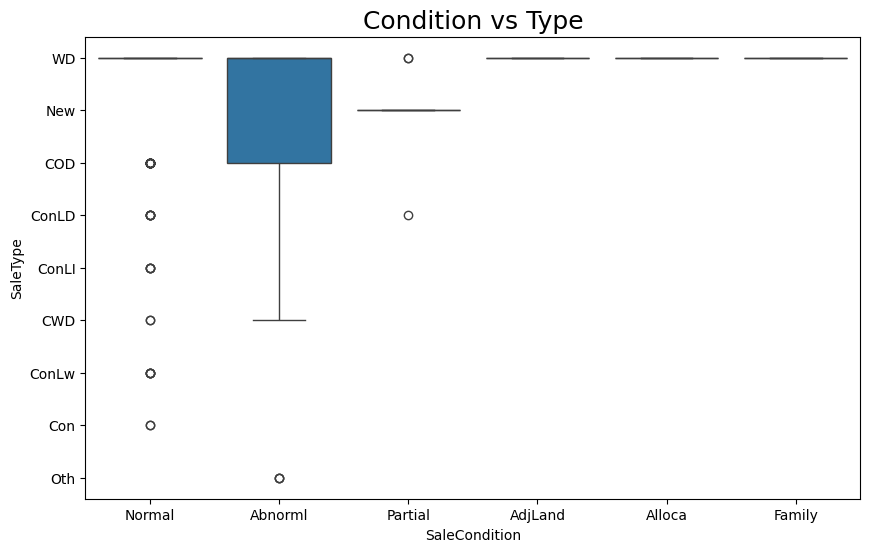

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SaleCondition', y='SaleType', data=df)
plt.title('Condition vs Type',size=18)

MULTIVARIABLE

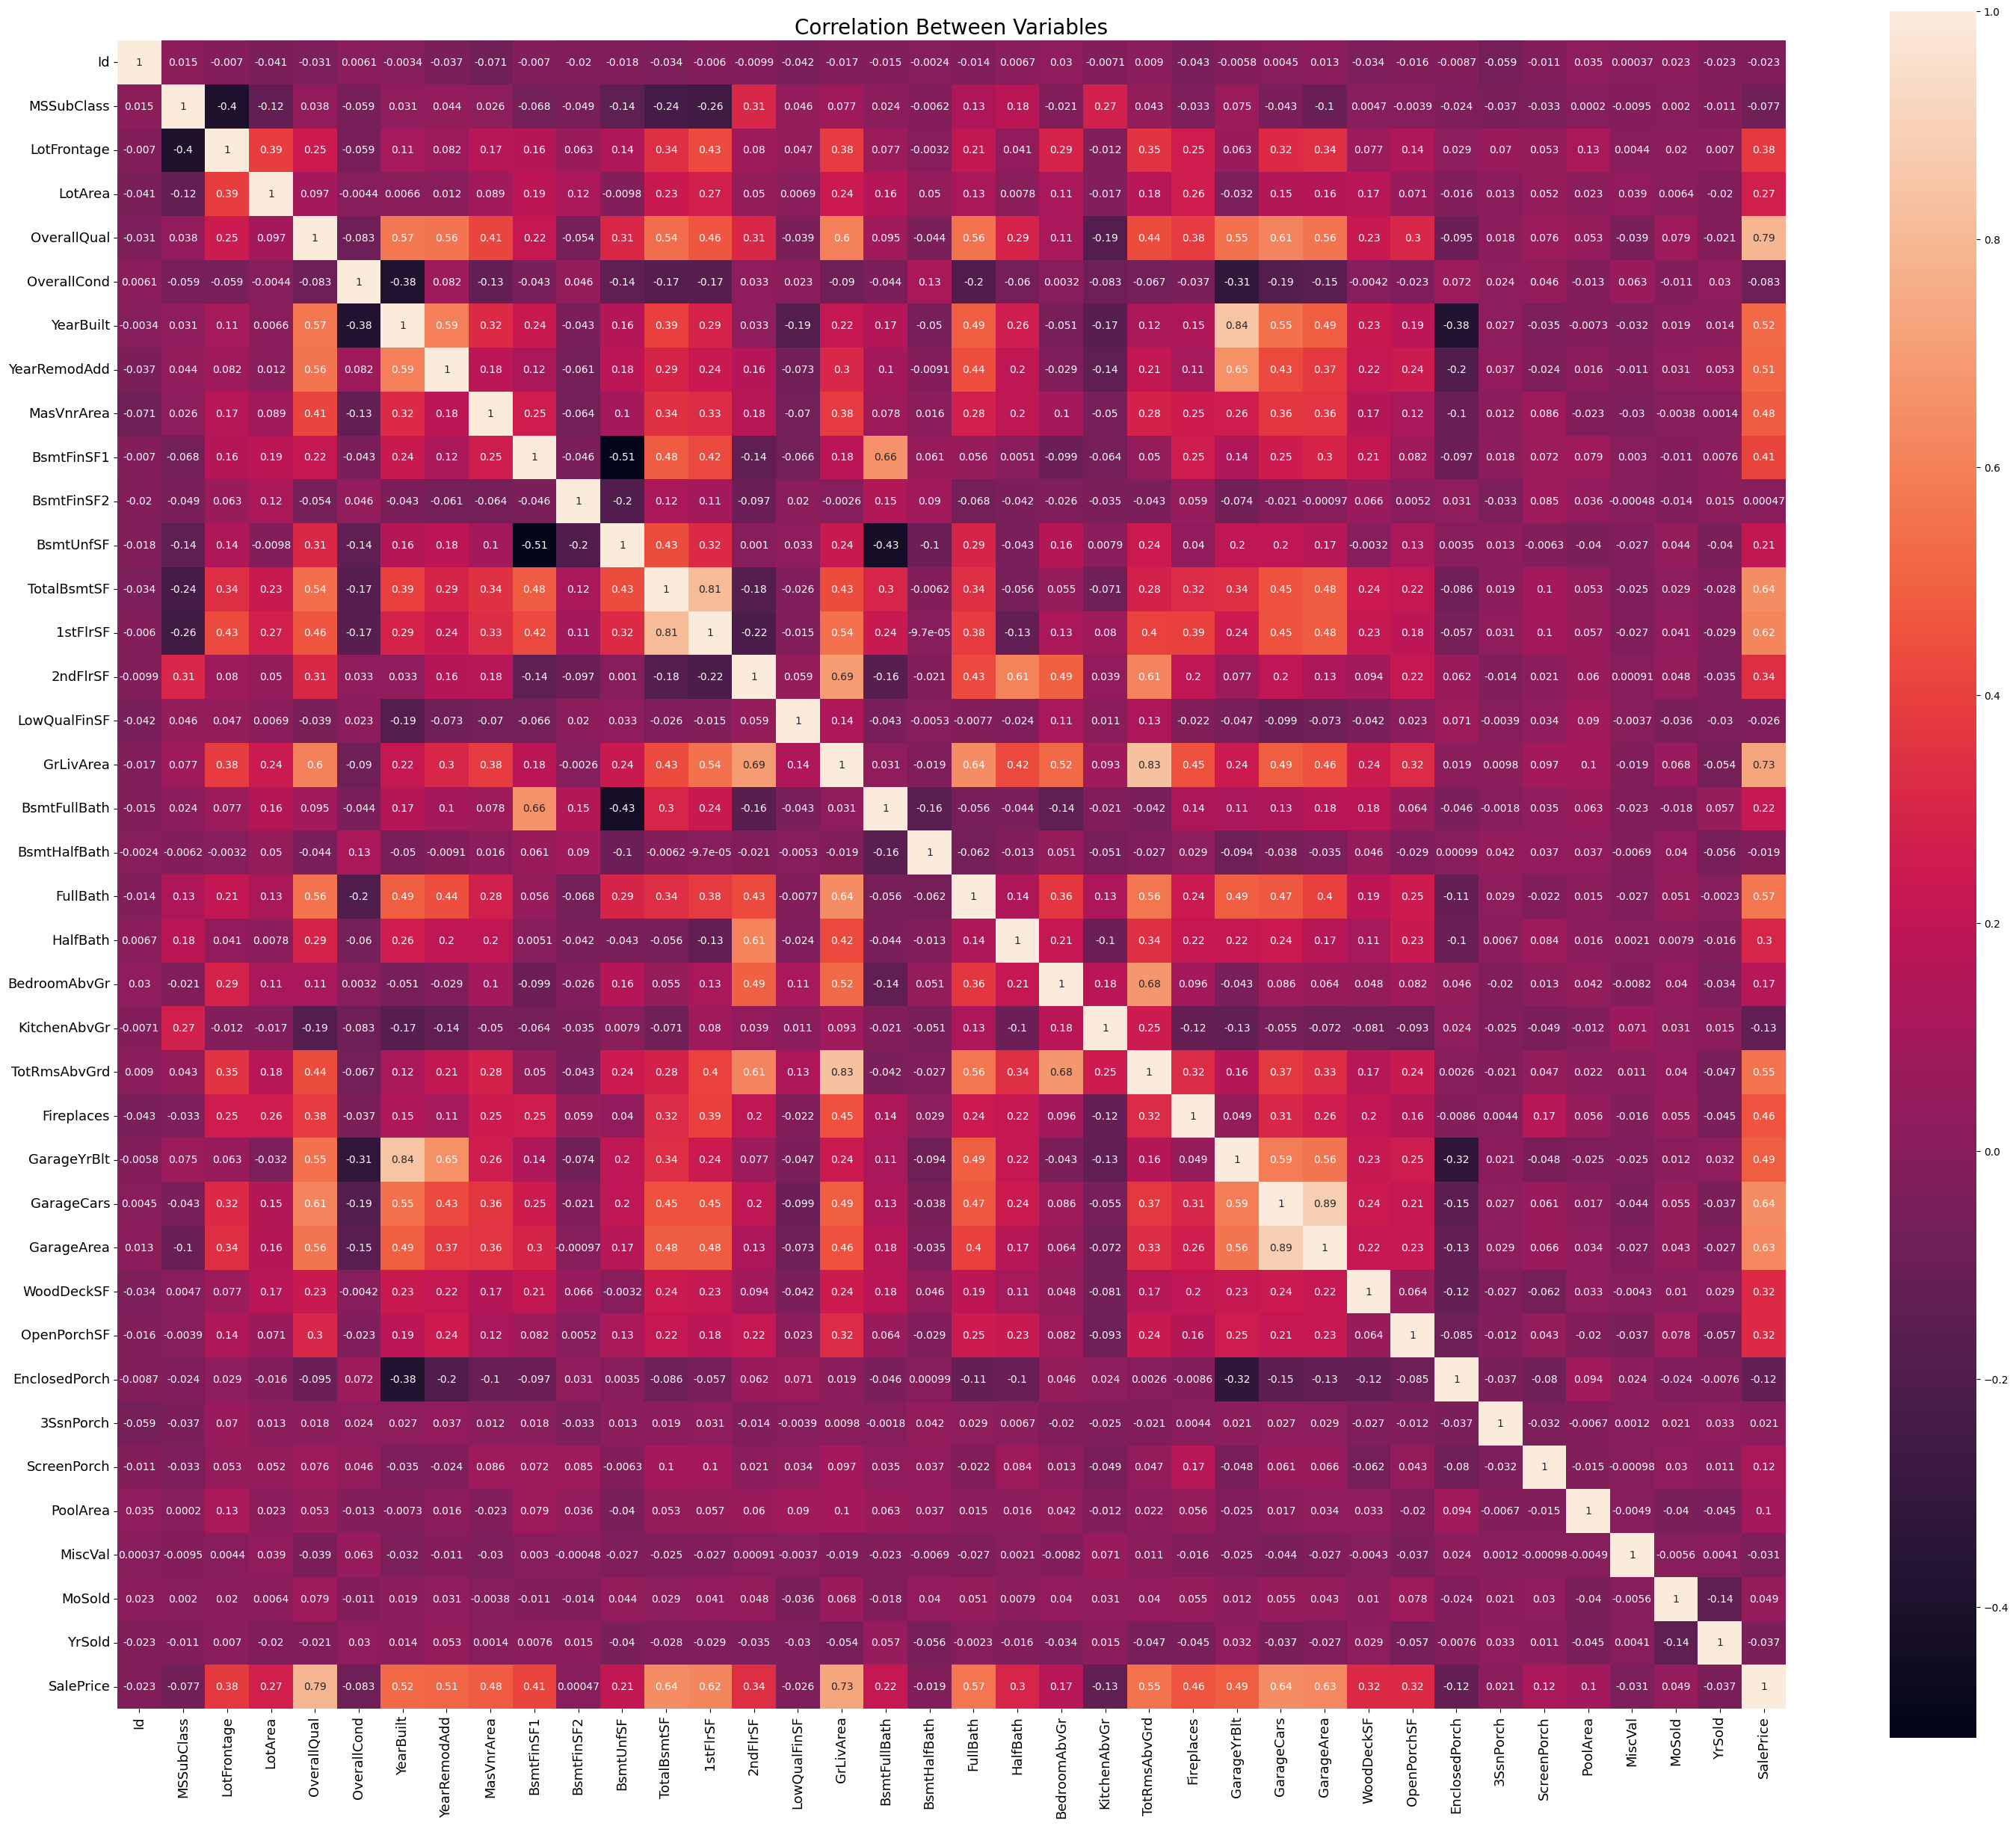

In [51]:
plt.figure(figsize=(36,30))
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, square=True)
plt.title('Correlation Between Variables', size=20)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

# Handling categorical missing values

In [68]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values

    print(df[categorical_cols])

# Handling numeric missing values

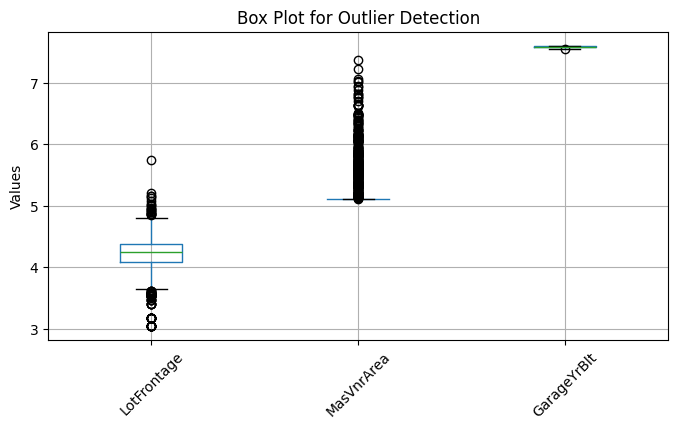

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Plot box plots
df[features]=np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [57]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median
    print(df[col])

0          1
1          2
2          3
3          4
4          5
        ... 
1254    1255
1255    1256
1256    1257
1257    1258
1258    1259
Name: Id, Length: 1259, dtype: int64
0       60
1       20
2       60
3       70
4       60
        ..
1254    60
1255    50
1256    20
1257    30
1258    80
Name: MSSubClass, Length: 1259, dtype: int64
0       4.174387
1       4.382027
2       4.219508
3       4.094345
4       4.430817
          ...   
1254    4.094345
1255    3.951244
1256    4.510860
1257    4.025352
1258    4.077537
Name: LotFrontage, Length: 1259, dtype: float64
0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1254     6931
1255     6240
1256    14303
1257     4060
1258     9587
Name: LotArea, Length: 1259, dtype: int64
0       7
1       6
2       7
3       7
4       8
       ..
1254    7
1255    6
1256    8
1257    5
1258    7
Name: OverallQual, Length: 1259, dtype: int64
0       5
1       8
2       5
3       5
4       5
       ..
1254   

# Creating new features

In [58]:
# Get columns that contain 'Yr' or 'Year'
year_columns = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]

# Convert year values into age-related features
for col in year_columns:
    df[col] = df['YrSold'] - df[col]
    print(df[col])

0        5
1       31
2        7
3       91
4        8
        ..
1254     5
1255    76
1256    14
1257    87
1258     3
Name: YearBuilt, Length: 1259, dtype: int64
0        5
1       31
2        6
3       36
4        8
        ..
1254     4
1255    57
1256    14
1257    59
1258     3
Name: YearRemodAdd, Length: 1259, dtype: int64
0       2000.397599
1       1999.411170
2       2000.398598
3       1998.400098
4       2000.399098
           ...     
1254    2000.397599
1255    1999.410158
1256    2000.402102
1257    2001.409148
1258    2000.396601
Name: GarageYrBlt, Length: 1259, dtype: float64
0       0
1       0
2       0
3       0
4       0
       ..
1254    0
1255    0
1256    0
1257    0
1258    0
Name: YrSold, Length: 1259, dtype: int64


# Feature transformation

In [59]:
import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
GrLivArea       1.186075
LotArea        12.348242
LotFrontage    -1.024363
MSSubClass      1.404451
SalePrice       1.963159
dtype: float64


In [60]:
import numpy as np

# The list of highly skewed features identified earlier
skew_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])
    print(df[col])

0       1.428968
1       1.477511
2       1.439718
3       1.409607
4       1.488584
          ...   
1254    1.409607
1255    1.374030
1256    1.506488
1257    1.392612
1258    1.405493
Name: LotFrontage, Length: 1259, dtype: float64
0       9.041922
1       9.169518
2       9.328123
3       9.164296
4       9.565214
          ...   
1254    8.843759
1255    8.738735
1256    9.568225
1257    8.308938
1258    9.168163
Name: LotArea, Length: 1259, dtype: float64
0       6.752270
1       7.140453
2       6.824374
3       6.867974
4       7.043160
          ...   
1254    6.633318
1255    6.865891
1256    7.594381
1257    6.761573
1258    7.061334
Name: 1stFlrSF, Length: 1259, dtype: float64
0       7.444249
1       7.140453
2       7.487734
3       7.448334
4       7.695303
          ...   
1254    7.412160
1255    7.220374
1256    7.594381
1257    6.761573
1258    7.061334
Name: GrLivArea, Length: 1259, dtype: float64
0       12.247694
1       12.109011
2       12.317167
3       11.8493

# Convert categorical features to numerical values

In [61]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['SalePrice'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)
    print(df[col])

0       3
1       3
2       3
3       3
4       3
       ..
1254    3
1255    1
1256    3
1257    3
1258    3
Name: MSZoning, Length: 1259, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
1254    1
1255    1
1256    1
1257    1
1258    1
Name: Street, Length: 1259, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
1254    1
1255    1
1256    1
1257    1
1258    1
Name: Alley, Length: 1259, dtype: int64
0       0
1       0
2       1
3       1
4       1
       ..
1254    0
1255    0
1256    1
1257    0
1258    1
Name: LotShape, Length: 1259, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
1254    1
1255    1
1256    1
1257    1
1258    1
Name: LandContour, Length: 1259, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
1254    1
1255    1
1256    1
1257    1
1258    1
Name: Utilities, Length: 1259, dtype: int64
0       1
1       2
2       1
3       3
4       2
       ..
1254    1
1255    1
125

In [62]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [63]:
encoding_maps = {}

for col in categorical_columns:
    labels_ordered = df.groupby([col])['SalePrice'].mean().sort_values().index
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}
    df[col] = df[col].map(labels_ordered)
    encoding_maps[col] = labels_ordered  # Simpan hasil encoding tiap kolom

# Tampilkan encoding map untuk semua kolom
for col, mapping in encoding_maps.items():
    print(f"Encoding for {col}:")
    print(mapping)
    print()


Encoding for MSZoning:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

Encoding for Street:
{0: 0, 1: 1}

Encoding for Alley:
{0: 0, 1: 1}

Encoding for LotShape:
{0: 0, 1: 1, 2: 2, 3: 3}

Encoding for LandContour:
{0: 0, 1: 1, 2: 2, 3: 3}

Encoding for Utilities:
{0: 0, 1: 1}

Encoding for LotConfig:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

Encoding for LandSlope:
{0: 0, 1: 1, 2: 2}

Encoding for Neighborhood:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24}

Encoding for Condition1:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

Encoding for Condition2:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}

Encoding for BldgType:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

Encoding for HouseStyle:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}

Encoding for RoofStyle:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

Encoding for RoofMatl:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

Encoding for Exteri